# ANN & MNIST -> DL "Hello World"
---

## 라이브러리 불러오기

In [33]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [34]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data() #keras 내부에도 mnist 데이터 지원

In [35]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [36]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 518
다음 그림은 숫자 7 입니다.


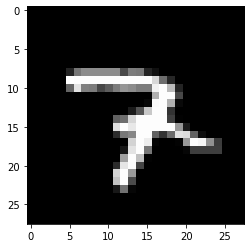

In [37]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap = 'gray')
plt.show()

## 데이터 전처리

* reshape

In [38]:
train_x.shape #2차원 이미지 데이터를 1차원으로 바꾸기 위해

(60000, 28, 28)

In [39]:
train_x = train_x.reshape([train_x.shape[0],-1]) #28 * 28을 1 * 784로 만든 것
test_x = test_x.reshape([test_x.shape[0],-1])

In [40]:
train_x.shape

(60000, 784)

* min-max scaling - 이미지에는 관습적으로 스케일링 적용

In [41]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [42]:
#정석적인 min-max scaling
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [43]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [44]:
from tensorflow.keras.utils import to_categorical

In [45]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [46]:
len_y = len(set(train_y))

In [47]:
train_y.shape

(60000,)

In [48]:
train_y = to_categorical(train_y, len_y) #len_y빼도 되지만 깐깐하게 전처리 규칙 지키면서 하자
test_y = to_categorical(test_y, len_y)

In [49]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [50]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [51]:
#Sequential API

#1. 세션 클리어
keras.backend.clear_session()

#2. 모델 선언
model = keras.models.Sequential()

#3. 레이어 조립
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
es = EarlyStopping(monitor='val_loss', #관측대상 : val_loss
                   min_delta=0,        #Threshold : 최소한 지정한 값 만큼 낮아져야 학습이 되었다, 만약 accuracy면 1
                   patience=5,         #성능 개선되지 않더라도 몇 번 참을래?
                   verbose=1,
                   restore_best_weights=True) #가장 성능이 좋았떤 epochs의 가중치를 쓸래?

In [54]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)
#validation_split : train_x, train_y에서 자체적으로 20%를 validation set으로 쓰겠다(모의고사)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5032 - accuracy: 0.8696 - val_loss: 0.3177 - val_accuracy: 0.9136
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3174 - accuracy: 0.9118 - val_loss: 0.2851 - val_accuracy: 0.9205
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.9181 - val_loss: 0.2786 - val_accuracy: 0.9231
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.9212 - val_loss: 0.2705 - val_accuracy: 0.9262
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2738 - accuracy: 0.9236 - val_loss: 0.2695 - val_accuracy: 0.9245
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9255 - val_loss: 0.2652 - val_accuracy: 0.9281
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2643 - accuracy: 0.9260 - val_loss: 0.2627 - val_accuracy:

In [55]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
pred_train[0]

313/313 [==============================] - 0s 1ms/step


array([8.1334605e-05, 9.2266752e-08, 9.1200438e-04, 2.4592000e-01,
       1.4716062e-07, 7.5280064e-01, 8.8438495e-10, 5.6860794e-05,
       1.7652566e-04, 5.2336683e-05], dtype=float32)

In [56]:
pred_train[0].argmax(axis = 0) #확률이 가장 높은 5번째 인덱스 값을 가져온 것이다, 10개 확률을 더하면 1

5

In [57]:
single_pred_train = pred_train.argmax(axis = 1)
single_pred_test = pred_test.argmax(axis = 1)

In [58]:
logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

In [59]:
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.41%
테스트 정확도 : 92.83%


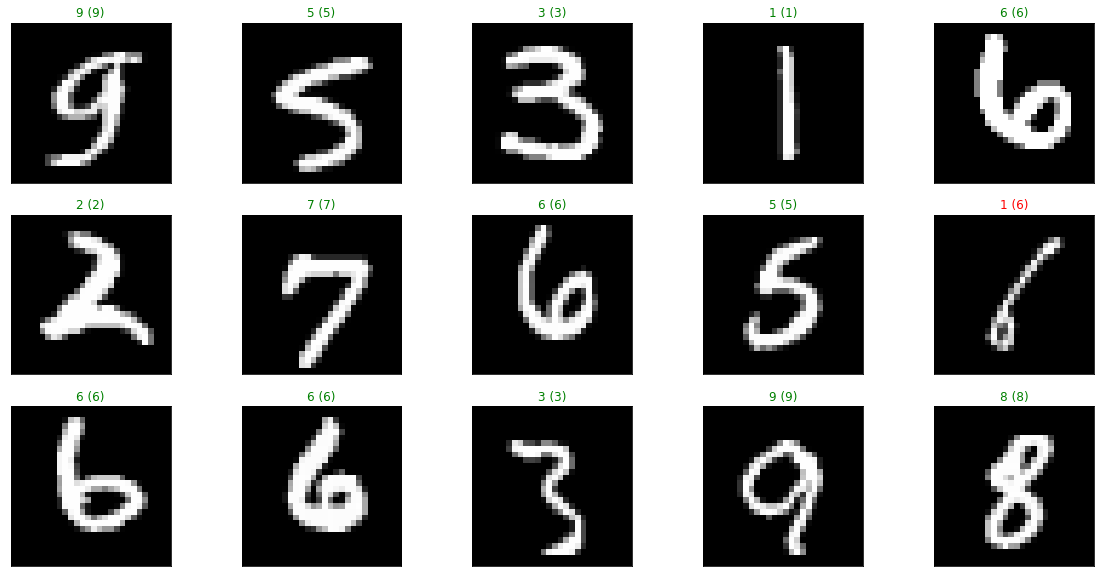

In [60]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 6532
다음 그림은 숫자 0 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [17.  0.  0. 60.  0.  0.  0. 16.  5.  0.]
틀렸어요


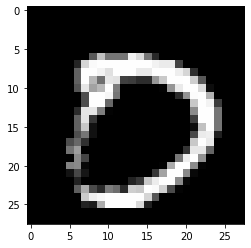

In [61]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [62]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9283


[0.2678092420101166, 0.9283000230789185]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [63]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [64]:
#1. 세션 클리어
keras.backend.clear_session()

#2. 모델 선언
model = keras.models.Sequential()

#3. 레이어 쌓기
model.add(keras.layers.Input(shape = (784, )))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

#5. 요약
model.summary() #학습되는 parameter가 335114개

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
es = EarlyStopping(monitor='val_loss',        #관측 대상
                   min_delta=0,               #임계값(Threshold)
                   patience=5,                #얼마나 참을지
                   verbose=1,                 
                   restore_best_weights=True) #가장 성능이 좋았던 시점의 가중치를 가져온다

In [67]:
model.fit(train_x, train_y, validation_split = 0.2, callbacks = [es],
          verbose = 1, epochs = 50)
#validation_split를 사용 안하면 EarlyStopping에서 val_loss가 의미 없다

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2225 - accuracy: 0.9330 - val_loss: 0.1149 - val_accuracy: 0.9664
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9698 - val_loss: 0.1078 - val_accuracy: 0.9670
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.1063 - val_accuracy: 0.9714
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9829 - val_loss: 0.1072 - val_accuracy: 0.9712
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.0990 - val_accuracy: 0.9737
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0960 - val_accuracy: 0.9749
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0979 - val_accuracy:

In [ ]:
#관측대상(val_loss)이 가장 낮은 값 기준 patience만큼 참으면 학습이 종료된다.
#즉 6번째 val_loss : 0.096 기준 5번 참고 종료

In [68]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 98.83%
테스트 정확도 : 97.51%


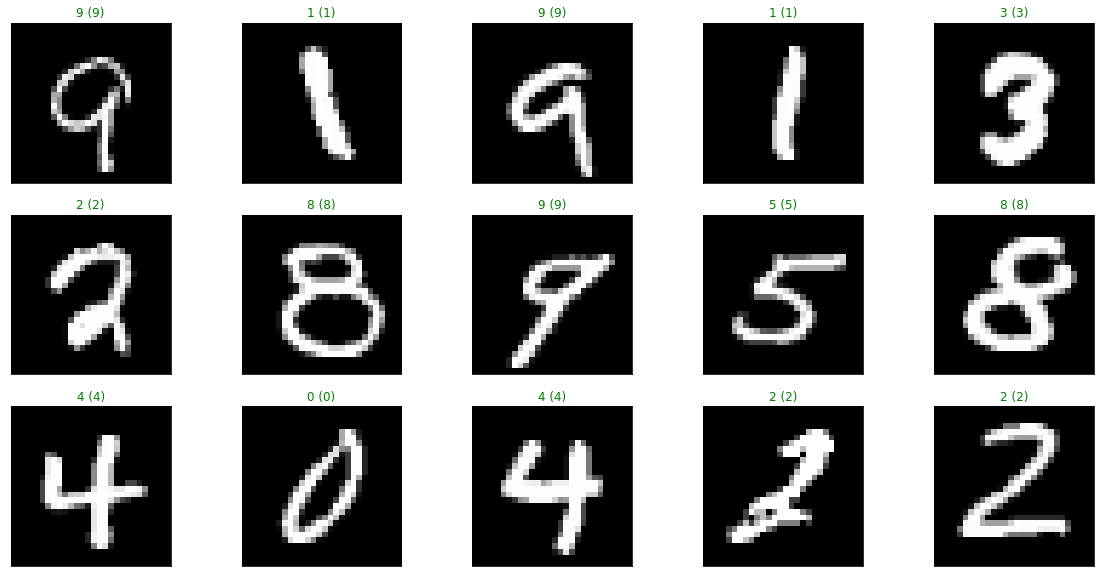

In [70]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 2863
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 59.  0.  0.  0.  0. 40.]
틀렸어요


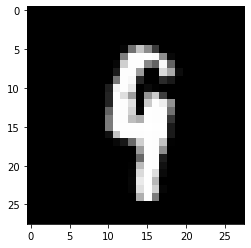

In [71]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [69]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9751


[0.09476637095212936, 0.9750999808311462]